In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

path="/content/Properties.csv"
data=pd.read_csv(path)
data.head()

,Alloy,Ultimate Tensile Strength,Melting Point,Thermal Conductivity,Density,Elongation,Hardness,Specific Heat,Mean Coefficient of thermal Exapansion,Elastic Modulus,Output
0,ATI 218 plus,1480,1343,13.7,8.25,25.0,48,0,0.0,0,1
1,Astroloy,0,1399,0.0,7.92,0.0,0,120,7.5,0,1
2,Hastelloy X,755,1316,9.1,8.22,0.0,87,0,13.0,0,1
3,Hastelloy S,1100,1360,14.0,8.75,46.0,0,0,11.5,212,1
4,Nimonic 80A,1250,1365,0.0,8.19,30.0,0,0,0.0,222,1


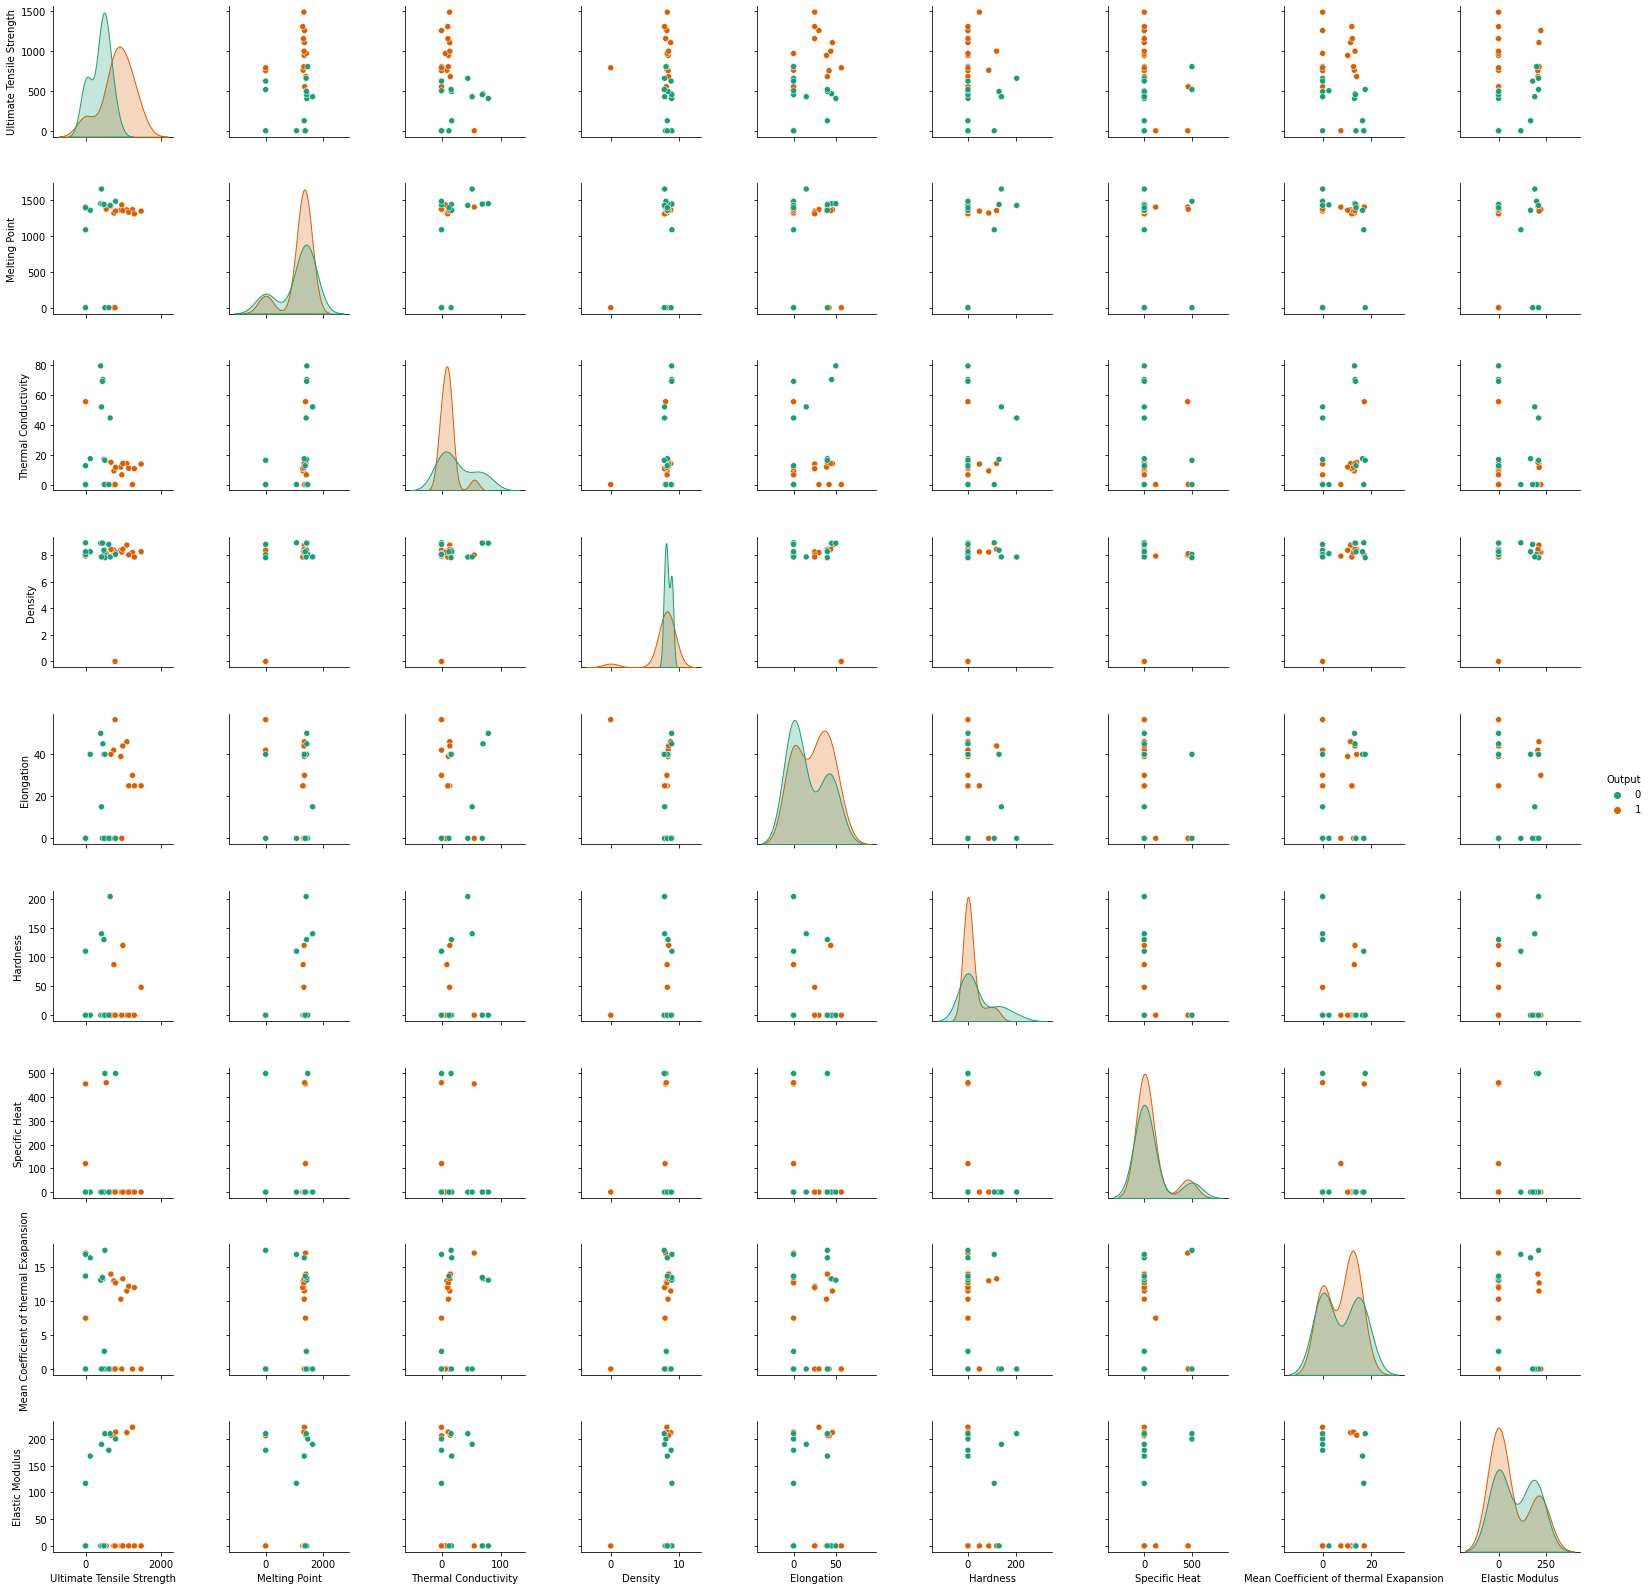

In [ ]:
import seaborn as sns
visualisation= sns.pairplot(data,hue="Output",palette="Dark2")
visualisation

In [ ]:
data.isnull().any().any()
data.isnull().any()

Alloy                                     False
Ultimate Tensile Strength                 False
Melting Point                             False
Thermal Conductivity                      False
Density                                   False
Elongation                                False
Hardness                                  False
Specific Heat                             False
Mean Coefficient of thermal Exapansion    False
Elastic Modulus                           False
Output                                    False
dtype: bool

In [ ]:
X=data.iloc[ : ,1:-1]
y=data.iloc[ : , -1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.4, random_state=42)

Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf1 = DecisionTreeClassifier(random_state=10)
clf1.fit(X_train, y_train)
y_pred=clf1.predict(X_test)
print("Accuracy " +str(accuracy_score(y_test, y_pred)*100)+"%")

Accuracy 58.333333333333336%


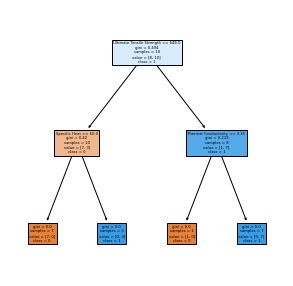

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
fig = plt.figure(figsize=(5,5))
_ = tree.plot_tree(clf1,feature_names=X.columns,class_names=['0', "1"],filled=True)

Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression(random_state=10).fit(X_train, y_train)
y_pred=clf2.predict(X_test)
print("Accuracy " +str(accuracy_score(y_test, y_pred)*100)+"%")


Accuracy 33.33333333333333%


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train,y_train)
y_pred=neigh.predict(X_test)
print("Accuracy " +str(accuracy_score(y_test, y_pred)*100)+"%")

Accuracy 83.33333333333334%


SVM


In [ ]:
from sklearn import svm
clf3 = svm.SVC(random_state=39)
clf3.fit(X_train, y_train)
y_pred=clf3.predict(X_test)
print("Accuracy " +str(accuracy_score(y_test, y_pred)*100)+"%")

Accuracy 50.0%


Hyperparameter Tuning


For Decision Tree

In [ ]:
# Create the parameter grid based on the results of random search
params = {
    'max_depth': [1,2, 3,4,5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [ ]:
from sklearn.model_selection import GridSearchCV#
#Instantiate the grid search model
grid_search = GridSearchCV(estimator=clf1,param_grid=params,cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
%%time
grid_search.fit(X, y)
dt_best = grid_search.best_estimator_

Fitting 4 folds for each of 70 candidates, totalling 280 fits
CPU times: user 429 ms, sys: 50.3 ms, total: 479 ms
Wall time: 2.58 s


In [ ]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))

In [ ]:
evaluate_model(dt_best)

Train Accuracy : 0.7777777777777778
Test Accuracy : 1.0


For SVM

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'C':[0.1,1,100,1000],'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6]}
grid = GridSearchCV(svm.SVC(),param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 100, 1000], 'degree': [1, 2, 3, 4, 5, 6],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [ ]:
print(grid.best_params_)
print(grid.score(X_test,y_test))

{'C': 1000, 'degree': 1, 'kernel': 'poly'}
0.5833333333333334


For Logistic Regression


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
dt_bst = grid_search.best_estimator_
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))

evaluate_model(dt_bst)

Train Accuracy : 0.7777777777777778
Test Accuracy : 0.8333333333333334


In [ ]:
from sklearn.feature_selection import chi2, SelectKBest, f_classif

In [ ]:
X_train = pd.DataFrame(X_train, columns = X.columns)

X_test = pd.DataFrame(X_test, columns=X.columns)

In [ ]:
# Get the two best(k = 2) features using the SelectKBest method
ft = SelectKBest(chi2, k = 2).fit(X_train, y_train)
print('Score: ', ft.scores_)
print('Columns: ', X_train.columns)

Score:  [1.07408203e+03 3.55449416e+02 2.39115651e+00 6.53048007e-03
 9.37500000e+00 2.57891221e+02 8.83508133e+01 1.66587303e+01
 2.64290495e+02]
Columns:  Index(['Ultimate Tensile Strength', 'Melting Point', 'Thermal Conductivity',
       'Density', 'Elongation', 'Hardness', 'Specific Heat',
       'Mean Coefficient of thermal Exapansion', 'Elastic Modulus'],
      dtype='object')


In [ ]:
ft = SelectKBest(f_classif, k= 2).fit(X_train, y_train)
print('Score: ', ft.scores_)
print('Columns: ', X_train.columns)

Score:  [4.04631417 2.21556467 0.10213361 0.51229861 0.39326211 2.86529695
 0.22104643 2.85466671 2.31602041]
Columns:  Index(['Ultimate Tensile Strength', 'Melting Point', 'Thermal Conductivity',
       'Density', 'Elongation', 'Hardness', 'Specific Heat',
       'Mean Coefficient of thermal Exapansion', 'Elastic Modulus'],
      dtype='object')


For KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [ ]:
from sklearn import metrics

In [ ]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [ ]:
# find the best score
g_res.best_score_

0.7777777777777778

In [ ]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', weights='distance')

In [ ]:
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

In [ ]:
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  1.0
Test set accuracy:  0.75


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_knn))

[[5 1]
 [2 4]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.80      0.67      0.73         6

    accuracy                           0.75        12
   macro avg       0.76      0.75      0.75        12
weighted avg       0.76      0.75      0.75        12



In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv =5)

In [ ]:
print('Model accuracy: ',np.mean(scores))

Model accuracy:  0.8
